In [69]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy import feature as cf
from cartopy.feature import BORDERS
from cartopy.feature import COASTLINE
from matplotlib.gridspec import GridSpec
from cartopy.io.img_tiles import StamenTerrain
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [70]:
ds = xr.open_dataset('HEAT_STRESS_DATA.nc')

In [71]:
year = ds.sel(time=ds.time.dt.year > 1976)

In [72]:
monthly = year.groupby(('time.month')).mean()


In [73]:
def heat_index ():
    C1 = [ -42.379, 2.04901523, 10.14333127, -0.22475541, -6.83783e-03, -5.481717e-02, 1.22874e-03, 8.5282e-04, -1.99e-06]
    C2 = [ 0.363445176, 0.988622465, 4.777114035, -0.114037667, -0.000850208, -0.020716198, 0.000687678, 0.000274954, 0]
    C3 = [ 16.923, 0.185212, 5.37941, -0.100254, 0.00941695, 0.00728898, 0.000345372, -0.000814971, 0.0000102102, -0.000038646, 0.0000291583, 0.00000142721, 0.000000197483, -0.0000000218429, 0.000000000843296, -0.0000000000481975]
    temp = monthly['t']
    hum = monthly['r']
    fahrenheit = ((temp * 1.8) - 459.67)
    T2 = pow(fahrenheit, 2)
    T3 = pow(fahrenheit, 3)
    H2 = pow(hum, 2)
    H3 = pow(hum, 3)
    HI=C1[0] + (C1[1] * fahrenheit) + (C1[2] * hum) + (C1[3] * fahrenheit * hum) + (C1[4] * T2) + (C1[5] * H2) + (C1[6] * T2 * hum) + (C1[7] * fahrenheit * H2) + (C1[8] * T2 * H2)
    return HI
   

In [74]:
HI = heat_index()

In [75]:
J=HI.sel(month=1)
F=HI.sel(month=2)
M=HI.sel(month=3)
A=HI.sel(month=4)
Ma=HI.sel(month=5)
Ju=HI.sel(month=6)
Jl=HI.sel(month=7)
Au=HI.sel(month=8)
S=HI.sel(month=9)
O=HI.sel(month=10)
N=HI.sel(month=11)
D=HI.sel(month=12)

In [76]:
MON_HI = xr.concat([J,F,M,A,Ma,Ju,Jl,Au,S,O,N,D],dim='longitude', data_vars='all')
MON_HI = MON_HI.drop('latitude')
MON_HI = MON_HI.drop('longitude')
MON_HI = MON_HI.drop('month')
MON_HI = MON_HI.values

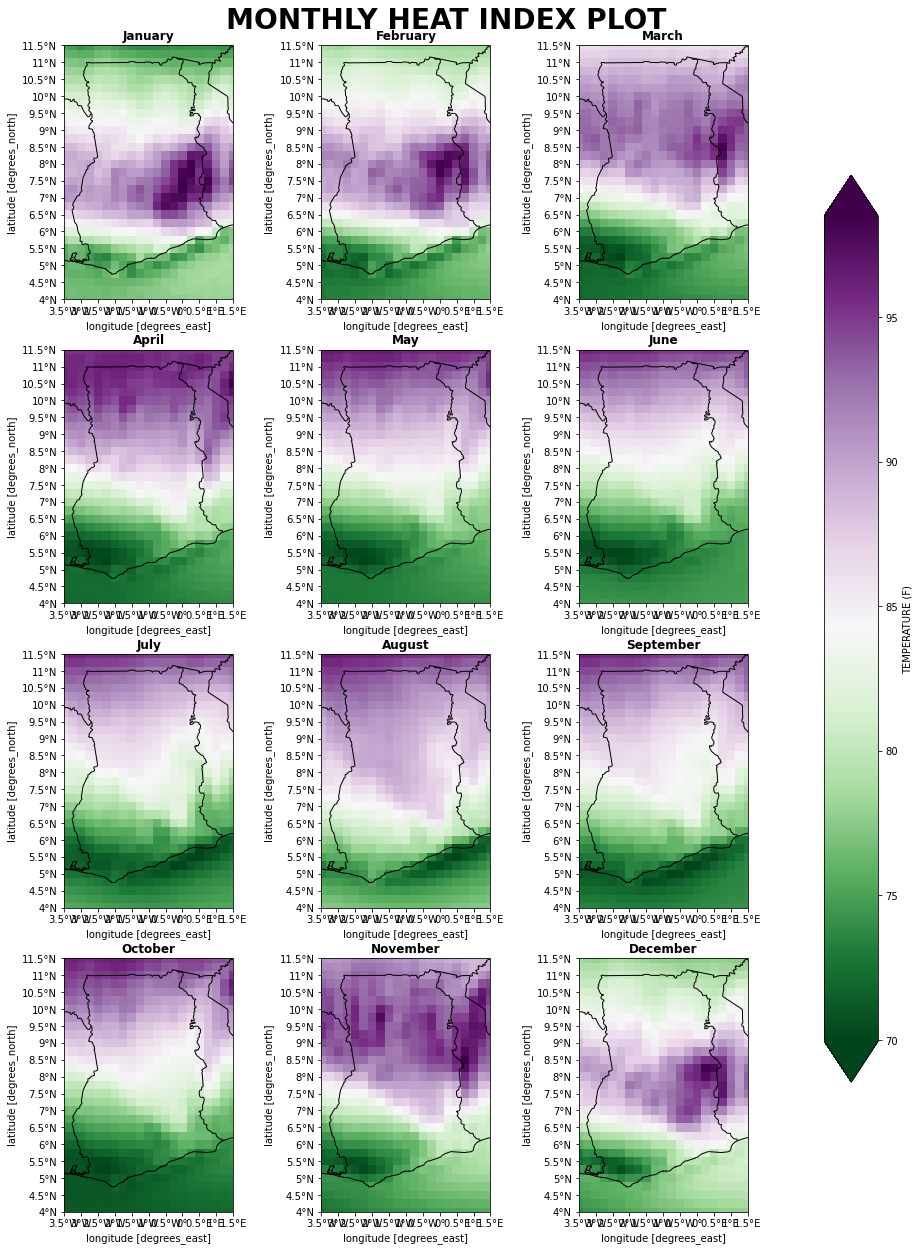

In [80]:
import matplotlib.cm as cm
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw = dict(projection = ccrs.PlateCarree()), figsize=(15,18), sharex = False)
plt.subplots_adjust(bottom=0.05, right=0.8, top=0.95)
for axis in axes:
    for ax in axis:
        ax.coastlines()
        ax.add_feature(cf.BORDERS)
        ax.set_extent([-3.5, 1.5 , 4,11.3])
        ax.set_xticks([-3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5])
        ax.set_yticks([11.5,11,10.5,10, 9.5, 9, 8.5, 8,7.5, 7, 6.5, 6, 5.5, 5, 4.5, 4], crs=ccrs.PlateCarree())
    
        lon_formatter = LongitudeFormatter()
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)

fig.suptitle('MONTHLY HEAT INDEX PLOT', fontsize =28, fontweight = 'bold')

        
J.plot(cmap='PRGn_r', ax = axes[0,0], add_colorbar = False)#, 
axes[0,0].set_title('January',fontweight = 'bold')
########################################
F.plot(cmap='PRGn_r', ax = axes[0,1],add_colorbar = False)#, 
axes[0,1].set_title('February',fontweight = 'bold')
#######################################
M.plot(cmap='PRGn_r', ax = axes[0,2], add_colorbar = False)#, 
axes[0,2].set_title('March',fontweight = 'bold')
#######################################
A.plot(cmap='PRGn_r', ax = axes[1,0], add_colorbar = False)#, 
axes[1,0].set_title('April',fontweight = 'bold')
#######################################
Ma.plot(cmap='PRGn_r', ax = axes[1,1], add_colorbar = False)#, 
axes[1,1].set_title('May',fontweight = 'bold')
#######################################
Ju.plot(cmap='PRGn_r', ax = axes[1,2], add_colorbar = False)#, 
axes[1,2].set_title('June',fontweight = 'bold')
#######################################
Jl.plot(cmap='PRGn_r', ax = axes[2,0], add_colorbar = False)#, 
axes[2,0].set_title('July',fontweight = 'bold')
#######################################
Au.plot(cmap='PRGn_r', ax = axes[2,1], add_colorbar = False)#, 
axes[2,1].set_title('August',fontweight = 'bold')
#######################################
S.plot(cmap='PRGn_r', ax = axes[2,2], add_colorbar = False)#, 
axes[2,2].set_title('September',fontweight = 'bold')
#######################################
O.plot(cmap='PRGn_r', ax = axes[3,0], add_colorbar = False)#, 
axes[3,0].set_title('October',fontweight = 'bold')
#######################################
N.plot(cmap='PRGn_r', ax = axes[3,1], add_colorbar = False)#, 
axes[3,1].set_title('November',fontweight = 'bold')
#######################################
D.plot(cmap='PRGn_r', ax = axes[3,2], add_colorbar = False)#, 
axes[3,2].set_title('December',fontweight = 'bold')
#######################################
for ax in axes.flat:
    #im = ax.imshow(MON_HI)
    im = plt.imshow(MON_HI, cmap=cm.PRGn_r)
    #ax.label_outer()
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])


#plt.colorbar(cmap=cm.hot, vmin=1.2, vmax=4.3)

fig.colorbar(im,cax=cbar_ax,orientation="vertical",label="TEMPERATURE (F)",extend='both')
#plt.colorbar(acbar_kwargs={"label": "TEMPERATURE (K)", "extend": "both"})


plt.savefig('MONTHLY-HEAT-INDEX.pdf')
plt.savefig('MONTHLY-HEAT-INDEX.jpg')

In [10]:

# jan = monthly.sel(month=1)
# feb = monthly.sel(month=2)
# mar = monthly.sel(month=3)
# apr = monthly.sel(month=4)
# may = monthly.sel(month=5)
# jun = monthly.sel(month=6)
# jul = monthly.sel(month=7)
# aug = monthly.sel(month=8)
# sep = monthly.sel(month=9)
# octb = monthly.sel(month=10)
# nov = monthly.sel(month=11)
# dec = monthly.sel(month=12)

In [11]:

#fahrenheit

In [12]:
#jan = monthly[1]

In [13]:
for file in ['HEAT_STRESS_DATA.nc']:
    ds = xr.open_dataset(file)
    Jan = ds.where(((ds['time.year'] > 1976) & (ds['time.month'] == 1)), drop=True)
    Feb = ds.where(((ds['time.year'] > 1976) & (ds['time.month'] == 2)), drop=True)
    Mar = ds.where(((ds['time.year'] > 1976) & (ds['time.month'] == 3)), drop=True)
    Apr = ds.where(((ds['time.year'] > 1976) & (ds['time.month'] == 4)), drop=True)
    May = ds.where(((ds['time.year'] > 1976) & (ds['time.month'] == 5)), drop=True)
    Jun = ds.where(((ds['time.year'] > 1976) & (ds['time.month'] == 6)), drop=True)
    Jul = ds.where(((ds['time.year'] > 1976) & (ds['time.month'] == 7)), drop=True)
    Aug = ds.where(((ds['time.year'] > 1976) & (ds['time.month'] == 8)), drop=True)
    Sep = ds.where(((ds['time.year'] > 1976) & (ds['time.month'] == 9)), drop=True)
    Oct = ds.where(((ds['time.year'] > 1976) & (ds['time.month'] == 10)), drop=True)
    Nov = ds.where(((ds['time.year'] > 1976) & (ds['time.month'] == 11)), drop=True)
    Dec = ds.where(((ds['time.year'] > 1976) & (ds['time.month'] == 12)), drop=True)

In [14]:
mon_dewpoint = ds.groupby(('time.month')).mean()

In [15]:
J = Jan.mean('time')
F = Feb.mean('time')
M = Mar.mean('time')
A = Apr.mean('time')
Ma = May.mean('time')
Ju = Jun.mean('time')
Jl = Jul.mean('time')
Au = Aug.mean('time')
S = Sep.mean('time')
O = Oct.mean('time')
N = Nov.mean('time')
D = Dec.mean('time')

In [16]:
C1 = [ -42.379, 2.04901523, 10.14333127, -0.22475541, -6.83783e-03, -5.481717e-02, 1.22874e-03, 8.5282e-04, -1.99e-06]
C2 = [ 0.363445176, 0.988622465, 4.777114035, -0.114037667, -0.000850208, -0.020716198, 0.000687678, 0.000274954, 0]
C3 = [ 16.923, 0.185212, 5.37941, -0.100254, 0.00941695, 0.00728898, 0.000345372, -0.000814971, 0.0000102102, -0.000038646, 0.0000291583, 0.00000142721, 0.000000197483, -0.0000000218429, 0.000000000843296, -0.0000000000481975]

In [17]:
temp = J['t']
hum = J['r']
fahrenheit = ((temp * 1.8) - 459.67)
T2 = pow(fahrenheit, 2)
T3 = pow(fahrenheit, 3)
H2 = pow(hum, 2)
H3 = pow(hum, 3)
HI_JAN = C1[0] + (C1[1] * fahrenheit) + (C1[2] * hum) + (C1[3] * fahrenheit * hum) + (C1[4] * T2) + (C1[5] * H2) + (C1[6] * T2 * hum) + (C1[7] * fahrenheit * H2) + (C1[8] * T2 * H2)

In [18]:
temp = F['t']
hum = F['r']
fahrenheit = ((temp * 1.8) - 459.67)
T2 = pow(fahrenheit, 2)
T3 = pow(fahrenheit, 3)
H2 = pow(hum, 2)
H3 = pow(hum, 3)
HI_FEB = C1[0] + (C1[1] * fahrenheit) + (C1[2] * hum) + (C1[3] * fahrenheit * hum) + (C1[4] * T2) + (C1[5] * H2) + (C1[6] * T2 * hum) + (C1[7] * fahrenheit * H2) + (C1[8] * T2 * H2)

In [19]:
temp = M['t']
hum = M['r']
fahrenheit = ((temp * 1.8) - 459.67)
T2 = pow(fahrenheit, 2)
T3 = pow(fahrenheit, 3)
H2 = pow(hum, 2)
H3 = pow(hum, 3)
HI_MAR = C1[0] + (C1[1] * fahrenheit) + (C1[2] * hum) + (C1[3] * fahrenheit * hum) + (C1[4] * T2) + (C1[5] * H2) + (C1[6] * T2 * hum) + (C1[7] * fahrenheit * H2) + (C1[8] * T2 * H2)

In [20]:
temp = A['t']
hum = A['r']
fahrenheit = ((temp * 1.8) - 459.67)
T2 = pow(fahrenheit, 2)
T3 = pow(fahrenheit, 3)
H2 = pow(hum, 2)
H3 = pow(hum, 3)
HI_APR = C1[0] + (C1[1] * fahrenheit) + (C1[2] * hum) + (C1[3] * fahrenheit * hum) + (C1[4] * T2) + (C1[5] * H2) + (C1[6] * T2 * hum) + (C1[7] * fahrenheit * H2) + (C1[8] * T2 * H2)

In [21]:
temp = Ma['t']
hum = Ma['r']
fahrenheit = ((temp * 1.8) - 459.67)
T2 = pow(fahrenheit, 2)
T3 = pow(fahrenheit, 3)
H2 = pow(hum, 2)
H3 = pow(hum, 3)
HI_MAY = C1[0] + (C1[1] * fahrenheit) + (C1[2] * hum) + (C1[3] * fahrenheit * hum) + (C1[4] * T2) + (C1[5] * H2) + (C1[6] * T2 * hum) + (C1[7] * fahrenheit * H2) + (C1[8] * T2 * H2)

In [22]:
temp = Ju['t']
hum = Ju['r']
fahrenheit = ((temp * 1.8) - 459.67)
T2 = pow(fahrenheit, 2)
T3 = pow(fahrenheit, 3)
H2 = pow(hum, 2)
H3 = pow(hum, 3)
HI_JUN = C1[0] + (C1[1] * fahrenheit) + (C1[2] * hum) + (C1[3] * fahrenheit * hum) + (C1[4] * T2) + (C1[5] * H2) + (C1[6] * T2 * hum) + (C1[7] * fahrenheit * H2) + (C1[8] * T2 * H2)

In [23]:
temp = Jl['t']
hum = Jl['r']
fahrenheit = ((temp * 1.8) - 459.67)
T2 = pow(fahrenheit, 2)
T3 = pow(fahrenheit, 3)
H2 = pow(hum, 2)
H3 = pow(hum, 3)
HI_JUL = C1[0] + (C1[1] * fahrenheit) + (C1[2] * hum) + (C1[3] * fahrenheit * hum) + (C1[4] * T2) + (C1[5] * H2) + (C1[6] * T2 * hum) + (C1[7] * fahrenheit * H2) + (C1[8] * T2 * H2)

In [24]:
temp = Au['t']
hum = Au['r']
fahrenheit = ((temp * 1.8) - 459.67)
T2 = pow(fahrenheit, 2)
T3 = pow(fahrenheit, 3)
H2 = pow(hum, 2)
H3 = pow(hum, 3)
HI_AUG = C1[0] + (C1[1] * fahrenheit) + (C1[2] * hum) + (C1[3] * fahrenheit * hum) + (C1[4] * T2) + (C1[5] * H2) + (C1[6] * T2 * hum) + (C1[7] * fahrenheit * H2) + (C1[8] * T2 * H2)

In [25]:
temp = S['t']
hum = S['r']
fahrenheit = ((temp * 1.8) - 459.67)
T2 = pow(fahrenheit, 2)
T3 = pow(fahrenheit, 3)
H2 = pow(hum, 2)
H3 = pow(hum, 3)
HI_SEP = C1[0] + (C1[1] * fahrenheit) + (C1[2] * hum) + (C1[3] * fahrenheit * hum) + (C1[4] * T2) + (C1[5] * H2) + (C1[6] * T2 * hum) + (C1[7] * fahrenheit * H2) + (C1[8] * T2 * H2)

In [26]:
temp = O['t']
hum = O['r']
fahrenheit = ((temp * 1.8) - 459.67)
T2 = pow(fahrenheit, 2)
T3 = pow(fahrenheit, 3)
H2 = pow(hum, 2)
H3 = pow(hum, 3)
HI_OCT = C1[0] + (C1[1] * fahrenheit) + (C1[2] * hum) + (C1[3] * fahrenheit * hum) + (C1[4] * T2) + (C1[5] * H2) + (C1[6] * T2 * hum) + (C1[7] * fahrenheit * H2) + (C1[8] * T2 * H2)

In [27]:
temp = N['t']
hum = N['r']
fahrenheit = ((temp * 1.8) - 459.67)
T2 = pow(fahrenheit, 2)
T3 = pow(fahrenheit, 3)
H2 = pow(hum, 2)
H3 = pow(hum, 3)
HI_NOV = C1[0] + (C1[1] * fahrenheit) + (C1[2] * hum) + (C1[3] * fahrenheit * hum) + (C1[4] * T2) + (C1[5] * H2) + (C1[6] * T2 * hum) + (C1[7] * fahrenheit * H2) + (C1[8] * T2 * H2)

In [28]:
temp = D['t']
hum = D['r']
fahrenheit = ((temp * 1.8) - 459.67)
T2 = pow(fahrenheit, 2)
T3 = pow(fahrenheit, 3)
H2 = pow(hum, 2)
H3 = pow(hum, 3)
HI_DEC = C1[0] + (C1[1] * fahrenheit) + (C1[2] * hum) + (C1[3] * fahrenheit * hum) + (C1[4] * T2) + (C1[5] * H2) + (C1[6] * T2 * hum) + (C1[7] * fahrenheit * H2) + (C1[8] * T2 * H2)

In [29]:
#Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [30]:
HI_JAN = xr.DataArray(HI_JAN,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_JAN",
)
HI_FEB= xr.DataArray(HI_FEB,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_FEB",
)
HI_MAR= xr.DataArray(HI_MAR,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_MAR",
)
HI_APR= xr.DataArray(HI_FEB,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_APR",
)
HI_MAY= xr.DataArray(HI_MAY,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_MAY",
)
HI_JUN= xr.DataArray(HI_JUN,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_JUN",
)
HI_JUL= xr.DataArray(HI_JUL,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_JUL",
)
HI_AUG= xr.DataArray(HI_AUG,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_AUG",
)
HI_SEP= xr.DataArray(HI_SEP,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_SEP",
)
HI_OCT= xr.DataArray(HI_OCT,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_OCT",
)
HI_NOV= xr.DataArray(HI_NOV,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_NOV",
)
HI_DEC= xr.DataArray(HI_DEC,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_DEC",
)

In [31]:
#MONTHLY_HI=xr.merge([HI_JAN, HI_FEB, HI_MAR,HI_APR,HI_MAY,HI_JUN,HI_JUL,HI_AUG,HI_SEP,HI_OCT,HI_NOV,HI_DEC])

In [32]:
#MONTHLY_HI.values

In [33]:
MONTHLY_HI=xr.concat([HI_JAN, HI_FEB, HI_MAR,HI_APR,HI_MAY,HI_JUN,HI_JUL,HI_AUG,HI_SEP,HI_OCT,HI_NOV,HI_DEC],dim='longitude', data_vars='all')

In [34]:
A=MONTHLY_HI.drop('latitude')

In [35]:
A=A.drop('longitude')

In [36]:
B=A.values

In [37]:
B

array([[80.8989  , 80.98457 , 80.91412 , ..., 81.590485, 81.42292 ,
        81.33025 ],
       [81.08652 , 81.13329 , 81.04051 , ..., 81.945114, 81.756325,
        81.618546],
       [81.22204 , 81.22363 , 81.18586 , ..., 82.21428 , 82.055534,
        81.98516 ],
       ...,
       [81.3338  , 81.35358 , 81.350464, ..., 81.973495, 81.97092 ,
        81.98717 ],
       [81.188866, 81.217415, 81.21017 , ..., 81.70418 , 81.68501 ,
        81.70207 ],
       [81.02904 , 81.05703 , 81.06847 , ..., 81.40378 , 81.39638 ,
        81.44081 ]], dtype=float32)

In [38]:
#fa = xr.open_dataset('sa.nc')
# var_name = ['HI_JAN', 'HI_FEB', 'HI_MAR','HI_APR','HI_MAY','HI_JUN','HI_JUL','HI_AUG','HI_SEP','HI_OCT','HI_NOV','HI_DEC']
# #fb=fa[['HI_JAN', 'HI_FEB', 'HI_MAR','HI_APR','HI_MAY','HI_JUN','HI_JUL','HI_AUG','HI_SEP','HI_OCT','HI_NOV','HI_DEC','latitude','longitude']]

In [39]:
HI_JAN.max()

<xarray.DataArray 'HI_JAN' ()>
array(87.5945282)

In [40]:
HI_FEB.max()

<xarray.DataArray 'HI_FEB' ()>
array(90.82751465)

In [41]:
HI_MAR.max()

<xarray.DataArray 'HI_MAR' ()>
array(94.85093689)

In [42]:
HI_APR.max()

<xarray.DataArray 'HI_APR' ()>
array(90.82751465)

In [43]:
HI_MAY.max()

<xarray.DataArray 'HI_MAY' ()>
array(98.4925766)

In [44]:
HI_JUN.max()

<xarray.DataArray 'HI_JUN' ()>
array(94.57829285)

In [45]:
HI_JUL.max()

<xarray.DataArray 'HI_JUL' ()>
array(88.53755951)

In [46]:
HI_AUG.max()

<xarray.DataArray 'HI_AUG' ()>
array(85.72232056)

In [47]:
HI_SEP.max()

<xarray.DataArray 'HI_SEP' ()>
array(89.78620911)

In [48]:
HI_OCT.max()

<xarray.DataArray 'HI_OCT' ()>
array(95.12149811)

In [49]:
HI_NOV.max()

<xarray.DataArray 'HI_NOV' ()>
array(91.85040283)

In [50]:
HI_DEC.max()

<xarray.DataArray 'HI_DEC' ()>
array(89.10594177)

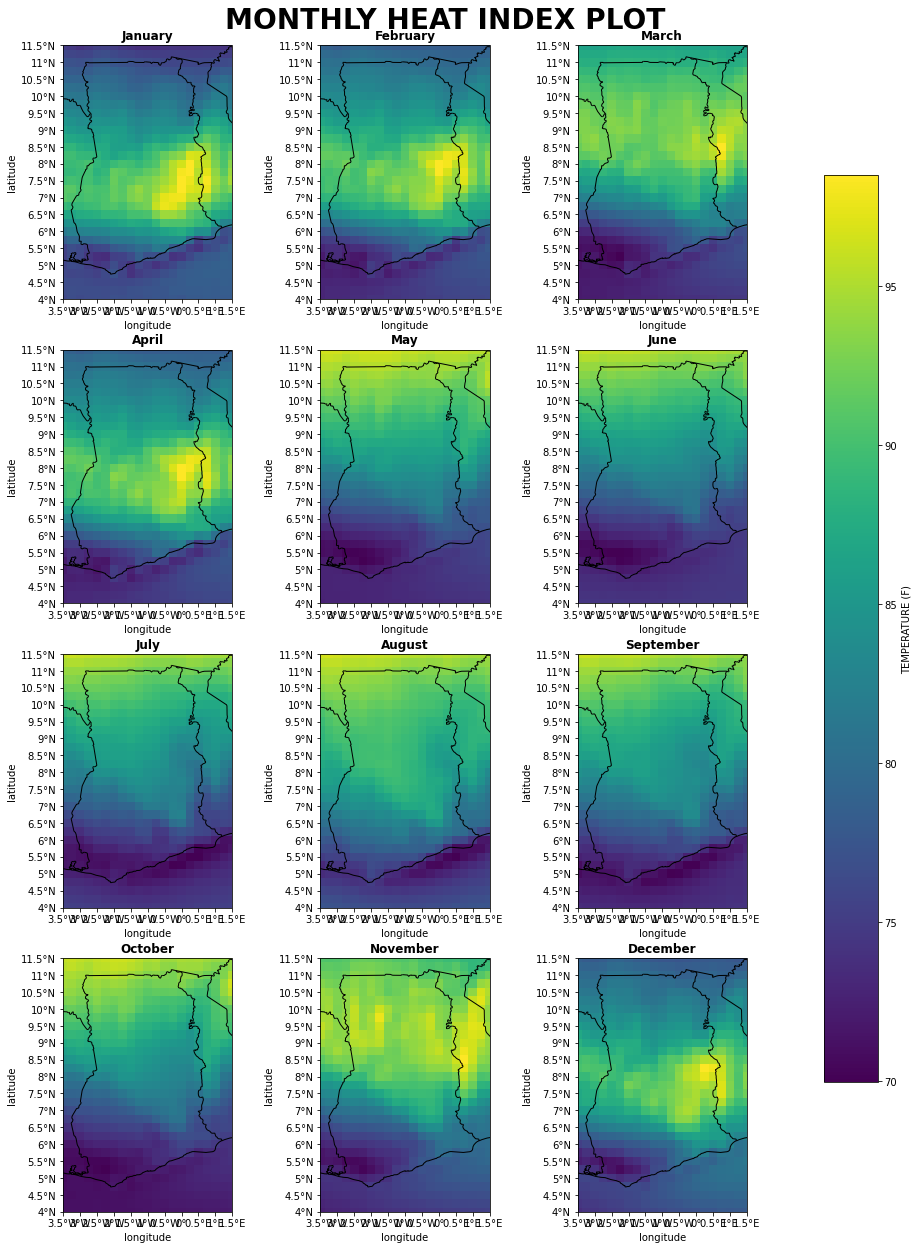

In [51]:
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw = dict(projection = ccrs.PlateCarree()), figsize=(15,18), sharex = False)
plt.subplots_adjust(bottom=0.05, right=0.8, top=0.95)
for axis in axes:
    for ax in axis:
        ax.coastlines()
        ax.add_feature(cf.BORDERS)
        ax.set_extent([-3.5, 1.5 , 4,11.3])
        ax.set_xticks([-3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5])
        ax.set_yticks([11.5,11,10.5,10, 9.5, 9, 8.5, 8,7.5, 7, 6.5, 6, 5.5, 5, 4.5, 4], crs=ccrs.PlateCarree())
    
        lon_formatter = LongitudeFormatter()
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)

fig.suptitle('MONTHLY HEAT INDEX PLOT', fontsize =28, fontweight = 'bold')        
        
HI_JAN.plot(cmap='viridis', ax = axes[0,0], add_colorbar = False)#, 
axes[0,0].set_title('January',fontweight = 'bold')
########################################
HI_FEB.plot(cmap='viridis', ax = axes[0,1],add_colorbar = False)#, 
axes[0,1].set_title('February',fontweight = 'bold')
#######################################
HI_MAR.plot(cmap='viridis', ax = axes[0,2], add_colorbar = False)#, 
axes[0,2].set_title('March',fontweight = 'bold')
#######################################
HI_APR.plot(cmap='viridis', ax = axes[1,0], add_colorbar = False)#, 
axes[1,0].set_title('April',fontweight = 'bold')
#######################################
HI_MAY.plot(cmap='viridis', ax = axes[1,1], add_colorbar = False)#, 
axes[1,1].set_title('May',fontweight = 'bold')
#######################################
HI_JUN.plot(cmap='viridis', ax = axes[1,2], add_colorbar = False)#, 
axes[1,2].set_title('June',fontweight = 'bold')
#######################################
HI_JUL.plot(cmap='viridis', ax = axes[2,0], add_colorbar = False)#, 
axes[2,0].set_title('July',fontweight = 'bold')
#######################################
HI_AUG.plot(cmap='viridis', ax = axes[2,1], add_colorbar = False)#, 
axes[2,1].set_title('August',fontweight = 'bold')
#######################################
HI_SEP.plot(cmap='viridis', ax = axes[2,2], add_colorbar = False)#, 
axes[2,2].set_title('September',fontweight = 'bold')
#######################################
HI_OCT.plot(cmap='viridis', ax = axes[3,0], add_colorbar = False)#, 
axes[3,0].set_title('October',fontweight = 'bold')
#######################################
HI_NOV.plot(cmap='viridis', ax = axes[3,1], add_colorbar = False)#, 
axes[3,1].set_title('November',fontweight = 'bold')
#######################################
HI_DEC.plot(cmap='viridis', ax = axes[3,2], add_colorbar = False)#, 
axes[3,2].set_title('December',fontweight = 'bold')
#######################################
for ax in axes.flat:
    #ss=np.array([HI_JAN,HI_FEB,HI_MAR,HI_APR,HI_MAY,HI_JUN,HI_JUL,HI_AUG,HI_SEP,HI_OCT,HI_NOV,HI_DEC])
    ss=B
    #ss=np.expand_dims(ss, axis=1)
    im = ax.imshow(ss)
    
    #ax.label_outer()
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

fig.colorbar(im,cax=cbar_ax,orientation="vertical",label="TEMPERATURE (F)")
#plt.colorbar(acbar_kwargs={"label": "TEMPERATURE (K)", "extend": "both"})


plt.savefig('MONTHLY-HEAT-INDEX.pdf')
plt.savefig('MONTHLY-HEAT-INDEX.jpg')

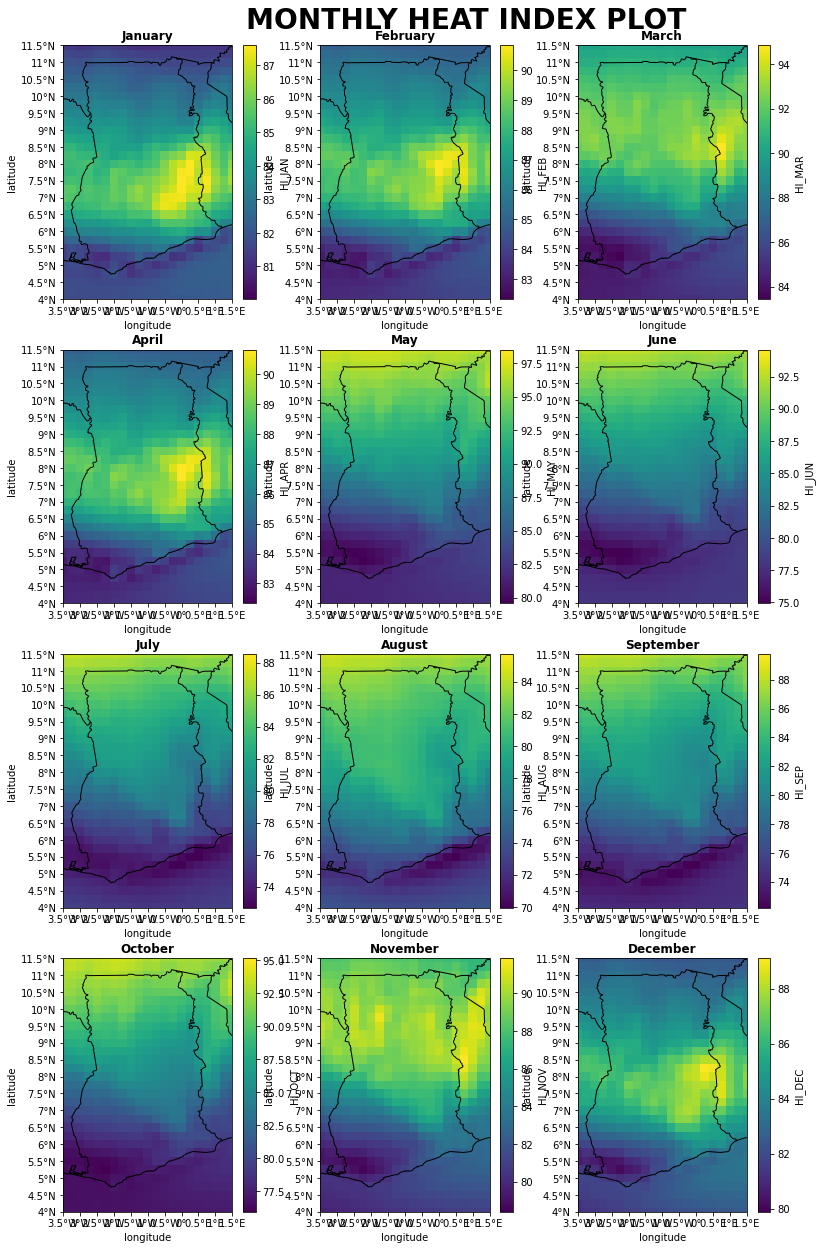

In [52]:
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw = dict(projection = ccrs.PlateCarree()), figsize=(15,18), sharex = False)
plt.subplots_adjust(bottom=0.05, right=0.8, top=0.95)
for axis in axes:
    for ax in axis:
        ax.coastlines()
        ax.add_feature(cf.BORDERS)
        ax.set_extent([-3.5, 1.5 , 4,11.3])
        ax.set_xticks([-3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5])
        ax.set_yticks([11.5,11,10.5,10, 9.5, 9, 8.5, 8,7.5, 7, 6.5, 6, 5.5, 5, 4.5, 4], crs=ccrs.PlateCarree())
    
        lon_formatter = LongitudeFormatter()
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)

fig.suptitle('MONTHLY HEAT INDEX PLOT', fontsize =28, fontweight = 'bold')        
        
HI_JAN.plot(cmap='viridis', ax = axes[0,0], add_colorbar = True)#, 
axes[0,0].set_title('January',fontweight = 'bold')
########################################
HI_FEB.plot(cmap='viridis', ax = axes[0,1],add_colorbar = True)#, 
axes[0,1].set_title('February',fontweight = 'bold')
#######################################
HI_MAR.plot(cmap='viridis', ax = axes[0,2], add_colorbar = True)#, 
axes[0,2].set_title('March',fontweight = 'bold')
#######################################
HI_APR.plot(cmap='viridis', ax = axes[1,0], add_colorbar = True)#, 
axes[1,0].set_title('April',fontweight = 'bold')
#######################################
HI_MAY.plot(cmap='viridis', ax = axes[1,1], add_colorbar = True)#, 
axes[1,1].set_title('May',fontweight = 'bold')
#######################################
HI_JUN.plot(cmap='viridis', ax = axes[1,2], add_colorbar = True)#, 
axes[1,2].set_title('June',fontweight = 'bold')
#######################################
HI_JUL.plot(cmap='viridis', ax = axes[2,0], add_colorbar = True)#, 
axes[2,0].set_title('July',fontweight = 'bold')
#######################################
HI_AUG.plot(cmap='viridis', ax = axes[2,1], add_colorbar = True)#, 
axes[2,1].set_title('August',fontweight = 'bold')
#######################################
HI_SEP.plot(cmap='viridis', ax = axes[2,2], add_colorbar = True)#, 
axes[2,2].set_title('September',fontweight = 'bold')
#######################################
HI_OCT.plot(cmap='viridis', ax = axes[3,0], add_colorbar = True)#, 
axes[3,0].set_title('October',fontweight = 'bold')
#######################################
HI_NOV.plot(cmap='viridis', ax = axes[3,1], add_colorbar = True)#, 
axes[3,1].set_title('November',fontweight = 'bold')
#######################################
HI_DEC.plot(cmap='viridis', ax = axes[3,2], add_colorbar = True)#, 
axes[3,2].set_title('December',fontweight = 'bold')
#######################################
# for ax in axes.flat:
#     #ss=np.array([HI_JAN,HI_FEB,HI_MAR,HI_APR,HI_MAY,HI_JUN,HI_JUL,HI_AUG,HI_SEP,HI_OCT,HI_NOV,HI_DEC])
#     #ss=np.expand_dims(ss, axis=1)
#     #im = ax.imshow(ss)
#     ax.label_outer()
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

#fig.colorbar(im,cax=cbar_ax,orientation="vertical",label="TEMPERATURE (K)")
#plt.colorbar(acbar_kwargs={"label": "TEMPERATURE (K)", "extend": "both"})


plt.savefig('MONTHLY-HEAT-INDEX.pdf')
plt.savefig('MONTHLY-HEAT-INDE.jpg')

In [53]:
ss=np.array([HI_JAN,HI_FEB,HI_MAR,HI_APR,HI_MAY,HI_JUN,HI_JUL,HI_AUG,HI_SEP,HI_OCT,HI_NOV,HI_DEC])

In [54]:
HI_JAN = xr.DataArray(HI_JAN,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_JAN",
)
HI_FEB= xr.DataArray(HI_FEB,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_FEB",
)
HI_MAR= xr.DataArray(HI_MAR,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_MAR",
)
HI_APR= xr.DataArray(HI_FEB,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_APR",
)
HI_MAY= xr.DataArray(HI_MAY,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_MAY",
)
HI_JUN= xr.DataArray(HI_JUN,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_JUN",
)
HI_JUL= xr.DataArray(HI_JUL,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_JUL",
)
HI_AUG= xr.DataArray(HI_AUG,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_AUG",
)
HI_SEP= xr.DataArray(HI_SEP,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_SEP",
)
HI_OCT= xr.DataArray(HI_OCT,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_OCT",
)
HI_NOV= xr.DataArray(HI_NOV,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_NOV",
)
HI_DEC= xr.DataArray(HI_DEC,
    dims=("latitude", "longitude"),
    coords={"latitude": [12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,
        9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
        7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,
        4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ], "longitude": [-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75,
       -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,
        0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ]},
    name="HI_DEC",
)

In [55]:
MONTHLY_HI=xr.merge([HI_JAN, HI_FEB, HI_MAR,HI_APR,HI_MAY,HI_JUN,HI_JUL])

In [56]:
MONTHLY_HI

<xarray.Dataset>
Dimensions:    (latitude: 37, longitude: 33)
Coordinates:
  * latitude   (latitude) float64 12.0 11.75 11.5 11.25 ... 3.75 3.5 3.25 3.0
  * longitude  (longitude) float64 -5.0 -4.75 -4.5 -4.25 ... 2.25 2.5 2.75 3.0
Data variables:
    HI_JAN     (latitude, longitude) float32 80.9 80.98 80.91 ... 81.71 81.75
    HI_FEB     (latitude, longitude) float32 84.67 84.74 84.67 ... 83.72 83.76
    HI_MAR     (latitude, longitude) float32 89.47 89.55 89.58 ... 84.78 84.82
    HI_APR     (latitude, longitude) float32 84.67 84.74 84.67 ... 83.72 83.76
    HI_MAY     (latitude, longitude) float32 97.97 98.22 98.49 ... 82.13 82.19
    HI_JUN     (latitude, longitude) float32 94.18 94.28 94.58 ... 78.25 78.26
    HI_JUL     (latitude, longitude) float32 88.18 88.13 88.45 ... 75.72 75.71

In [57]:
# MONTHLY_HI=xr.merge([HI_JAN, HI_FEB, HI_MAR,HI_APR,HI_MAY,HI_JUN,HI_JUL])

In [58]:
HI_JAN

<xarray.DataArray 'HI_JAN' (latitude: 37, longitude: 33)>
array([[80.8989  , 80.98457 , 80.91412 , ..., 80.223366, 80.093254,
        80.02615 ],
       [81.08652 , 81.13329 , 81.04051 , ..., 80.617615, 80.46334 ,
        80.349495],
       [81.22204 , 81.22363 , 81.18586 , ..., 80.91995 , 80.78045 ,
        80.72    ],
       ...,
       [81.3338  , 81.35358 , 81.350464, ..., 81.991905, 81.96025 ,
        81.967445],
       [81.188866, 81.217415, 81.21017 , ..., 81.87635 , 81.843605,
        81.85273 ],
       [81.02904 , 81.05703 , 81.06847 , ..., 81.72419 , 81.71054 ,
        81.752045]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 12.0 11.75 11.5 11.25 ... 3.75 3.5 3.25 3.0
  * longitude  (longitude) float64 -5.0 -4.75 -4.5 -4.25 ... 2.25 2.5 2.75 3.0

In [59]:
# ncols = 4
# nrows = 1


# fig, axes = plt.subplots(nrows, ncols, subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(30, 12))
# axes.flatten()
# for ax in axes:
    
#     ax.coastlines(lw=3)
#     ax.add_feature(cf.BORDERS, lw=3)
#     ax.set_extent([-3.5, 1.5 , 4,11.3])
#     ax.set_xticks([-3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5])
#     ax.set_yticks([11.5,11,10.5,10, 9.5, 9, 8.5, 8,7.5, 7, 6.5, 6, 5.5, 5, 4.5, 4], crs=ccrs.PlateCarree())

#     lon_formatter = LongitudeFormatter()
#     lat_formatter = LatitudeFormatter()
#     ax.xaxis.set_major_formatter(lon_formatter)


# lon_formatter = LongitudeFormatter()
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)

# HI_JAN.plot(ax=axes[0],

#        cmap = 'RdBu_r',
#        cbar_kwargs={"label": "TEMPERATURE (K)", "extend": "both"},

#        )
# axes[0].set_title('JANUARY',fontweight = 'bold', fontsize = 20)

# HI_FEB.plot(ax=axes[1],

#        cmap = 'RdBu_r',
#        cbar_kwargs={"label": "TEMPERATURE (K)", "extend": "both"},

#        )
# axes[1].set_title('FEBRUARY',fontweight = 'bold', fontsize = 20)

# HI_MAR.plot(ax=axes[2],

#        cmap = 'RdBu_r',
#        cbar_kwargs={"label": "TEMPERATURE (K)", "extend": "both"},

#        )
# axes[2].set_title('MARCH',fontweight = 'bold', fontsize = 20)

# HI_APR.plot(axes=axes[3],


#       cmap = 'RdBu_r',
#       cbar_kwargs={"label": "TEMPERATURE (K)", "extend": "both"},

#       )
# axes[3].set_title('APRIL',fontweight = 'bold', fontsize = 20)

# # HI_MAY.plot(axes=axes[4],


# #       cmap = 'RdBu_r',
# #       cbar_kwargs={"label": "TEMPERATURE (K)", "extend": "both"},

# #       )
# # axes[4].set_title('APRIL',fontweight = 'bold', fontsize = 20)



# plt.savefig('MEAN_TEMPERATURE.pdf')
# plt.savefig('MEAN_TEMPERATURE.jpg')

In [60]:
#11.3N 4S 1.5E -3.5W

In [61]:
# df = pd.read_csv(r'HEAT_STRESS_DATA.csv')
# cols = [0]
# df2=df.drop(df.columns[cols], axis=1, inplace=True)
# df2 = pd.DataFrame(df2)
# df3.set_index('time')
# df3.to_csv('HEAT_STRESS_DATA.csv')


In [62]:
# df = pd.read_csv(r'HEAT_STRESS_DATA.csv')
# mapping = {df.columns[0]: 'Month'}
# df.rename(columns=mapping, inplace=True)
# df.set_index('Month')
# #df.to_csv('HEAT_STRESS_DATA.csv')


In [63]:
# #!/usr/bin/python
# # Heat-Index calculator with celsius-grade
# #
# # Simple Python scratch meant to test the different available
# # heat-index formulas with temperatures lower than 25*C/77 Fahrenheit.
# # 
# # Formulas are at https://en.wikipedia.org/wiki/Heat_index#Formula
# #
# # GregNau	2015

# #print("\nHeat-Index calculator v0.1\n")

# # Ask for the current temperature in celsius-grade...
# #temp = float(input('Temperature(*C): '))
# temp = T,V
# # ...then wait for the relative humidity in % value
# hum = R
# # Convert celius to fahrenheit (heat-index is only fahrenheit compatible)
# fahrenheit = ((temp * 9/5) + 32)

# # Creating multiples of 'fahrenheit' & 'hum' values for the coefficients
# T2 = pow(fahrenheit, 2)
# T3 = pow(fahrenheit, 3)
# H2 = pow(hum, 2)
# H3 = pow(hum, 3)

# # Coefficients for the calculations
# C1 = [ -42.379, 2.04901523, 10.14333127, -0.22475541, -6.83783e-03, -5.481717e-02, 1.22874e-03, 8.5282e-04, -1.99e-06]
# C2 = [ 0.363445176, 0.988622465, 4.777114035, -0.114037667, -0.000850208, -0.020716198, 0.000687678, 0.000274954, 0]
# C3 = [ 16.923, 0.185212, 5.37941, -0.100254, 0.00941695, 0.00728898, 0.000345372, -0.000814971, 0.0000102102, -0.000038646, 0.0000291583, 0.00000142721, 0.000000197483, -0.0000000218429, 0.000000000843296, -0.0000000000481975]

# # Calculating heat-indexes with 3 different formula
# HI = C1[0] + (C1[1] * fahrenheit) + (C1[2] * hum) + (C1[3] * fahrenheit * hum) + (C1[4] * T2) + (C1[5] * H2) + (C1[6] * T2 * hum) + (C1[7] * fahrenheit * H2) + (C1[8] * T2 * H2)
# #heatindex2 = C2[0] + (C2[1] * fahrenheit) + (C2[2] * hum) + (C2[3] * fahrenheit * hum) + (C2[4] * T2) + (C2[5] * H2) + (C2[6] * T2 * hum) + (C2[7] * fahrenheit * H2) + (C2[8] * T2 * H2)
# #heatindex3 = C3[0] + (C3[1] * fahrenheit) + (C3[2] * hum) + (C3[3] * fahrenheit * hum) + (C3[4] * T2) + (C3[5] * H2) + (C3[6] * T2 * hum) + (C3[7] * fahrenheit * H2) + (C3[8] * T2 * H2) + (C3[9] * T3) + (C3[10] * H3) + (C3[11] * T3 * hum) + (C3[12] * fahrenheit * H3) + (C3[13] * T3 * H2) + (C3[14] * T2 * H3) + (C3[15] * T3 * H3)
# HI = ((HI - 32) * 5/9)
# #print("\nThe Heat index or the feels-like temperature is:")
# #print("Heatindex 1:"),
# #print(round(((heatindex1 - 32) * 5/9), 0)),
# #print("*C")
# # print("Heatindex 2:"),
# # print(round(((heatindex2 - 32) * 5/9), 0)),
# # print("*C")
# # print("Heatindex 3:"),
# # print(round(((heatindex3 - 32) * 5/9), 0)),
# # print("*C")

# WIND CHILL INDEX

# DISCOMFORT HEAT INDEX